In [136]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
file_path_trained = "Train_Tagged_Titles.tsv"
file_path_test = "test.tsv"

df = pd.read_csv(file_path_trained, sep='\t', quoting=3)
print(df)

       Record Number                                              Title  \
0                  1  Supreme Nike SB Dunk High By any Means Red US1...   
1                  1  Supreme Nike SB Dunk High By any Means Red US1...   
2                  1  Supreme Nike SB Dunk High By any Means Red US1...   
3                  1  Supreme Nike SB Dunk High By any Means Red US1...   
4                  1  Supreme Nike SB Dunk High By any Means Red US1...   
...              ...                                                ...   
55178           5000  Herren Trekking Schuhe Outdoor Sneaker Sportsc...   
55179           5000  Herren Trekking Schuhe Outdoor Sneaker Sportsc...   
55180           5000  Herren Trekking Schuhe Outdoor Sneaker Sportsc...   
55181           5000  Herren Trekking Schuhe Outdoor Sneaker Sportsc...   
55182           5000  Herren Trekking Schuhe Outdoor Sneaker Sportsc...   

             Token              Tag  
0          Supreme           Modell  
1             Nike     

In [124]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
import random

In [144]:
#separate title sentences and split them by words in list
df['words_in_title'] = df.apply(lambda r: r['Title'].split(' '), axis=1)

# Title, Tags, and Tokens - separated into individual words.
flat_words = [word for sentence in df['words_in_title'] for word in sentence]
flat_tokens = [token for token in df['Token']]
flat_tags = [tag for tag in df['Tag']]

print("Number of words in titles: " + str(len(flat_words)))
#print("Titles (each word): ")
#print(flat_words)

print("Number of different types of tokens: " + str(len(flat_tokens)))
print( flat_tokens)

print("Number of corresponding  tags: " + str(len(flat_tags)))
print( flat_tags)


Number of words in titles: 657357
Number of different types of tokens: 55183
['Supreme', 'Nike', 'SB', 'Dunk', 'High', 'By', 'any', 'Means', 'Red', 'US10', 'EU44', 'Supreme', 'Box', 'Logo', 'Air', 'Force', 'New', 'Balance', '530', 'Männer', 'und', 'Frauen', 'Laufschuhe', 'mit', 'Buchstaben', 'N', 'bequeme', 'Laufschuhe', '♥', 'MICHAEL', 'KORS', 'Sneaker', 'Gr', '39', '♥', 'New', 'Balance', 'ML', '574', 'EGO', 'Turnschuhe', 'grün', 'Nike', 'air', 'jordan', '9', 'og', ',', 'space', 'jam', ',', 'hare', ',', 'bugs', 'bunny', ',', 'EU', '45', '/', 'US', '11', 'NEU', '+', 'RECHNUNG', 'NEU', 'SKECHERS', 'Damen', 'Sneakers', 'Turnschuhe', 'Memory', 'Foam', 'MODA', '-', 'LAZY', 'SUNDAYS', 'Blau', 'New', 'Balance', '550', 'White', 'Green', 'CAT', 'CATERPILLAR', 'Arise', 'Sneaker', 'Freizeitschuhe', 'Turnschuhe', 'Schuhe', 'Herren', 'Neuheit', 'Adidas', 'NMD', 'R1', 'STLT', 'PK', 'Primeknit', 'Sneaker', 'Turnschuhe', 'CQ2388', 'blau', 'Gr', '.', '36', '-', '42', 'NEU', 'Damen', 'Sneaker', 'Mesh',

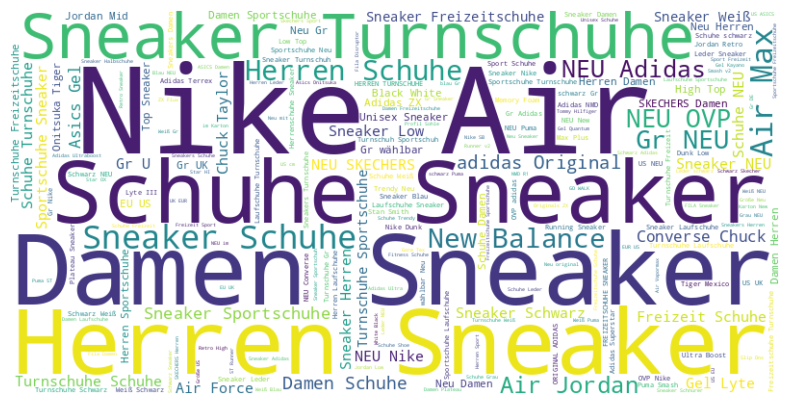

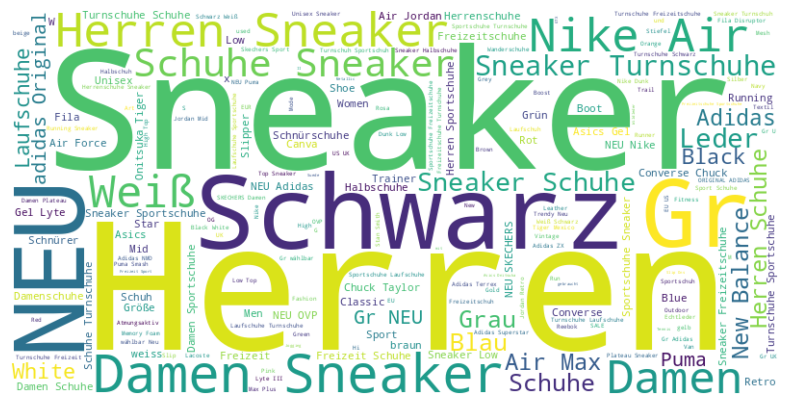

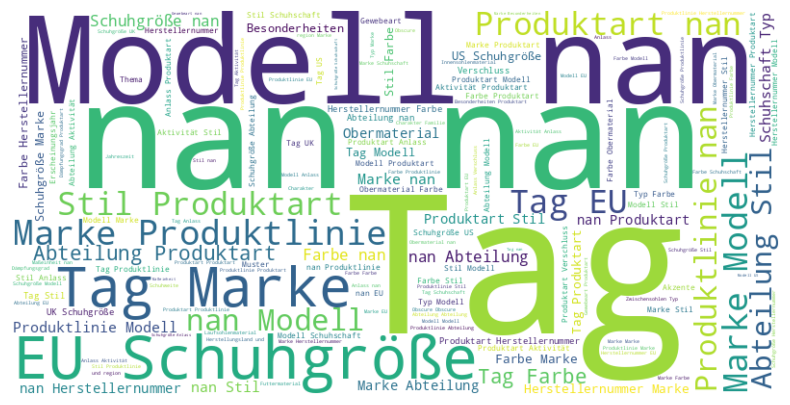

In [90]:
word_tile = ([str(item) for item in flat_words])
wordcloudwords = WordCloud(width=800, height=400, background_color='white').generate(" ".join(word_tile))

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudwords, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

print("\n")

word_token = ([str(item) for item in flat_tokens])
wordcloudtoken = WordCloud(width=800, height=400, background_color='white').generate(" ".join(word_token))

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudtoken, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

print("\n")

word_tag = ([str(item) for item in flat_tags])
wordcloudtag = WordCloud(width=800, height=400, background_color='white').generate(" ".join(word_tag))

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudtag, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

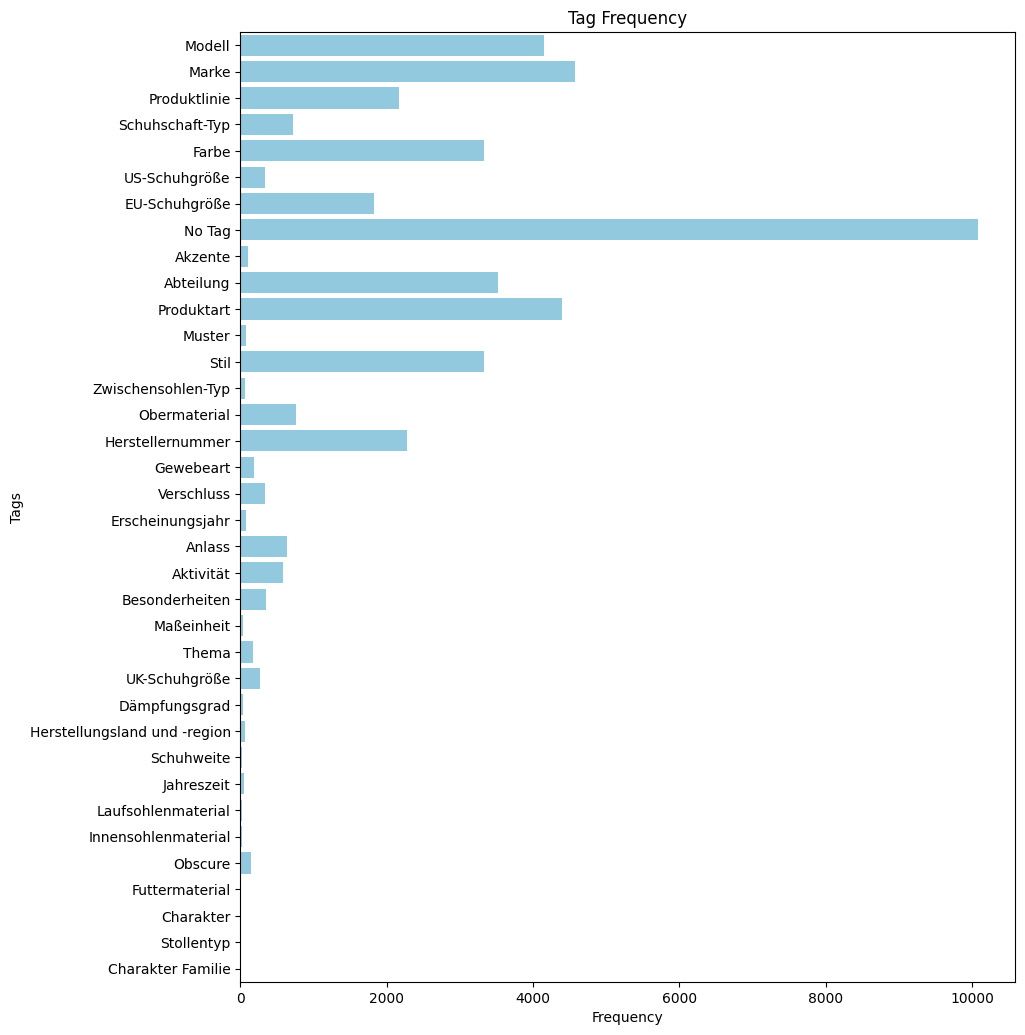

In [103]:

tag_counts = Counter(flat_tags)

plt.figure(figsize=(10, len(tag_counts) / 3))
sns.barplot(x=list(tag_counts.values()), y=list(tag_counts.keys()), color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.title('Tag Frequency')
plt.show()


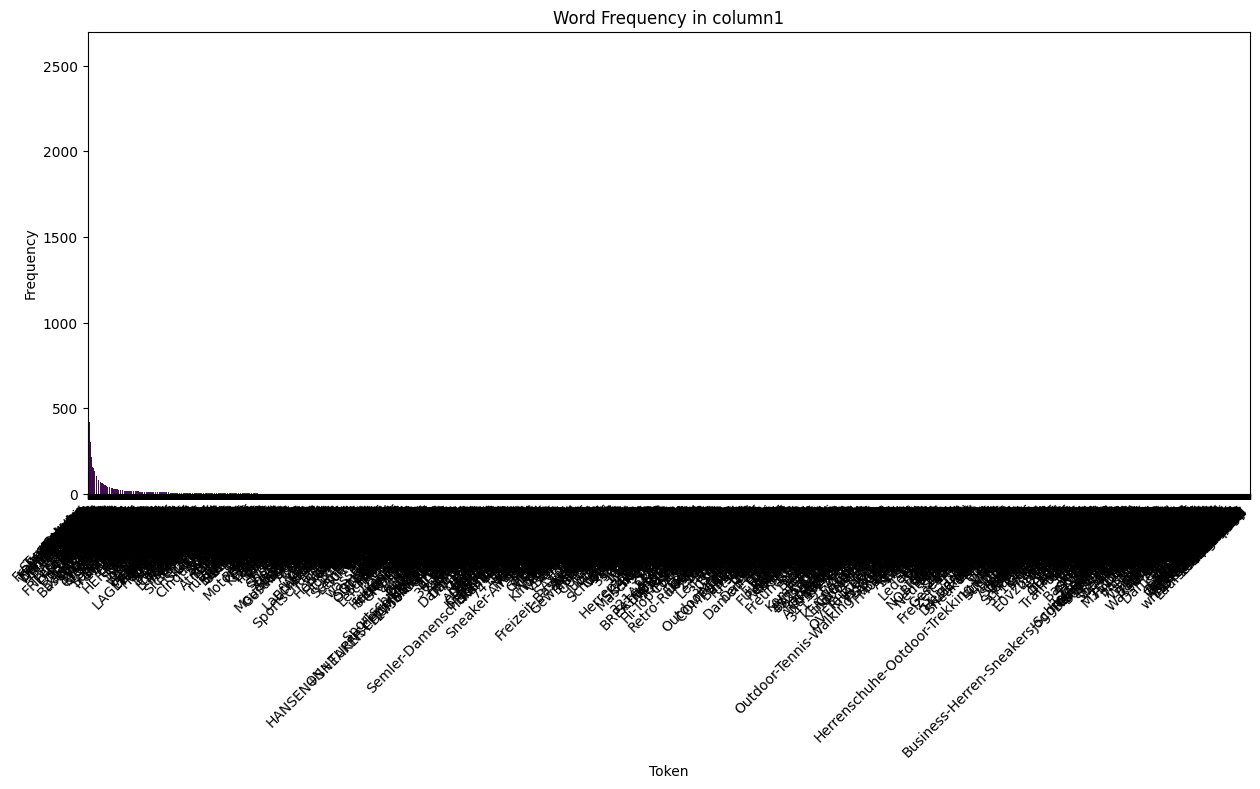

In [135]:

# Combine the words into a single string
word_counts = df['Token'].value_counts()

plt.figure(figsize=(15, 6))
ax = sns.barplot(x=word_counts.index, y=word_counts.values, palette='viridis')

plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title('Word Frequency in column1')
plt.xticks(rotation=45, ha='right')
plt.show()

In [139]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [156]:
#pre processing steps (includes tokenization, stopword removal and counting words, chars in sentences)

# Tokenize words
words_title = word_tokenize(''.join(flat_words))
#print("\nTokenized Words:")
#print(words_title)

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english') + list(string.punctuation))
filtered_words = [word.lower() for word in words_title if word.lower() not in stop_words]

print("\nNumber of Words after removing stopwords and punctuation:")
print(len(filtered_words))

sentences = sent_tokenize(''.join(df['Title']))

df['Word Count'] = df['Title'].apply(lambda x: len(word_tokenize(x)))
df['Character Count'] = df['Title'].apply(lambda x: len((x)))

print(df)


Number of Words after removing stopwords and punctuation:
27805
       Record Number                                              Title  \
0                  1  Supreme Nike SB Dunk High By any Means Red US1...   
1                  1  Supreme Nike SB Dunk High By any Means Red US1...   
2                  1  Supreme Nike SB Dunk High By any Means Red US1...   
3                  1  Supreme Nike SB Dunk High By any Means Red US1...   
4                  1  Supreme Nike SB Dunk High By any Means Red US1...   
...              ...                                                ...   
55178           5000  Herren Trekking Schuhe Outdoor Sneaker Sportsc...   
55179           5000  Herren Trekking Schuhe Outdoor Sneaker Sportsc...   
55180           5000  Herren Trekking Schuhe Outdoor Sneaker Sportsc...   
55181           5000  Herren Trekking Schuhe Outdoor Sneaker Sportsc...   
55182           5000  Herren Trekking Schuhe Outdoor Sneaker Sportsc...   

             Token              Ta